<div align=center>

# Deep Learning Assignment

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Prerequisites


In [113]:
# DO NOT EDIT THIS CELL
# DO NOT IMPORT ANY OTHER ENTITIES INTO THE NOTEBOOK

import matplotlib.pyplot as plt
import tensorflow.keras as keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.datasets import cifar10
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D
from keras.activations import sigmoid, relu, softmax
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy
from keras.metrics import CategoricalAccuracy

### Loading the CIFAR-10 Dataset


In [114]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Data Preprocessing


In [115]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### Visualizing the Dataset


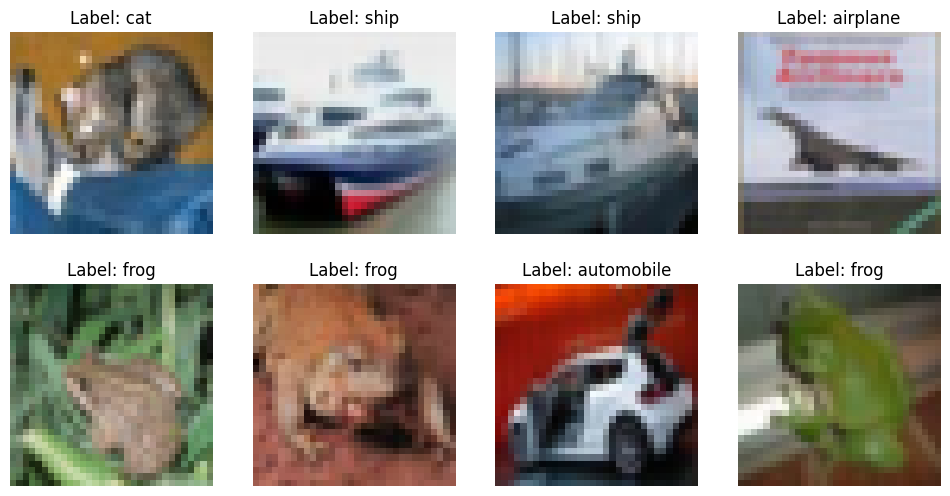

In [116]:
sample_images = X_test[:8, :, :, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :, :, :])
    plt.title(f"Label: {labels[sample_labels[i, :].argmax()]}")
    plt.axis("off")

plt.show()

### Building the DNN Model


In [120]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(
    Conv2D(
        filters=16,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation=relu))
model.add(Dense(units=32, activation=relu))
model.add(Dense(units=10, activation=softmax))

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=[CategoricalAccuracy()],
)

model.summary()

model.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, Y_test),
)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,938 (878.66 KB)

 Trainable params: 224,938 (878.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - categorical_accuracy: 0.2864 - loss: 1.8959 - val_categorical_accuracy: 0.5213 - val_loss: 1.3167
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - categorical_accuracy: 0.5400 - loss: 1.2703 - val_categorical_accuracy: 0.6089 - val_loss: 1.1051
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - categorical_accuracy: 0.6271 - loss: 1.0427 - val_categorical_accuracy: 0.6461 - val_loss: 1.0062
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - categorical_accuracy: 0.6773 - loss: 0.9143 - val_categorical_accuracy: 0.6807 - val_loss: 0.9079
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - categorical_accuracy: 0.7140 - loss: 0.8096 - val_categorical_accuracy: 0.6782 - val_loss: 0.9211
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - categorical_accuracy: 0.7405 - loss: 0.7381 - val_categorical_accuracy: 0.7146 - val_loss: 0.8299
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - catego

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


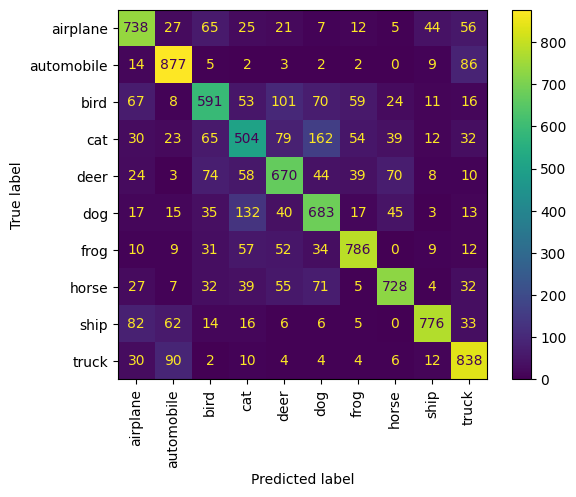

In [121]:
Y_test_hat = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_test_hat.argmax(axis=1, keepdims=True),
    ),
    display_labels=labels,
).plot(xticks_rotation="vertical")